## Converting TCGA imaging data to a machine learning friendly format

The tissue cancer atlas (TCGA) contains a wealth of information that can be used to power machine learning models. This notebook outlines how to use our tcga_utils library to download whole slide images in the TCGA by uuid and convert them to a format that is friendly for machine learning. In this case, we elect to scale the data to 20X magnification (by convention, this is 0.5 microns per pixel), identify areas that have tissue by using color filters, and then create tiles of size 512 pixels x 512 pixels thatcontain at least 50% tissue.

In [1]:
# Import packages

from tcga_utils import download_utils
from tcga_utils import wsi_utils
from matplotlib import pyplot as plt

import openslide
import pandas as pd
import numpy as np

In [2]:
# Load the manifest file that was downloaded from the TCGA website. 
# This contains the uuids of all the samples thathave whole slide imaging
# data

df = download_utils.load_manifest_file('/data/manifest/gdc_manifest.2020-01-07.txt')

In [3]:
# Download the wsi associated with the uuid

wsi_file = download_utils.download_by_uuids(df['id'][0], save_direc = '/data/TCGA')
print(wsi_file)

/data/TCGA/TCGA-AO-A12E-01A-01-BSA.9b55ad59-32de-4238-9958-b54e3a43eb2e.svs


In [4]:
# Load the slide using openslide

wsi_file = '/data/TCGA/TCGA-AO-A12E-01A-01-BSA.9b55ad59-32de-4238-9958-b54e3a43eb2e.svs'
slide = wsi_utils.open_slide(wsi_file)

In [5]:
# Convert the wsi to tiles. Note we set mpp (microns per pixel) to 0.5, 
# which is effectively 20X resolution.

tiles = wsi_utils.slide_to_tiles(slide, new_mpp=0.5, tile_size=512, overlap=0)

In [6]:
# Filter tiles to identify the ones that have >50% tissue
filtered_tiles = wsi_utils.filter_tiles(tiles, tissue_threshold=50)    

Displaying tile 84 of 116


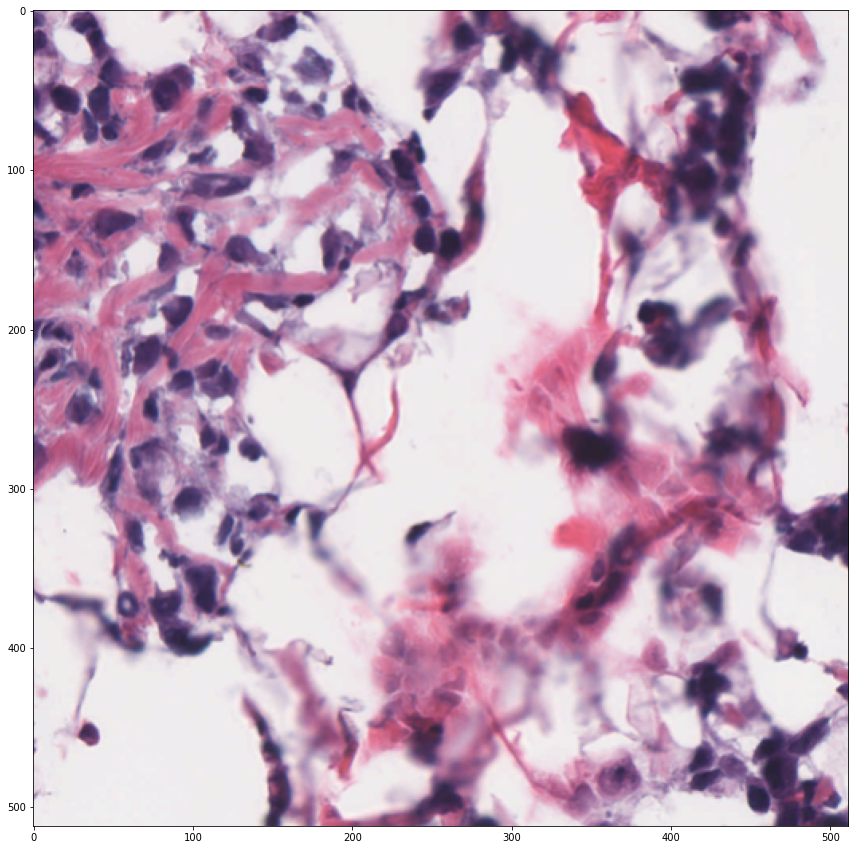

In [12]:
# Display a tile as a sanity check
n_tiles = filtered_tiles.shape[0]
index = np.random.choice(n_tiles)

print('Displaying tile %d of %d' %(index+1, n_tiles))

fig, axes = plt.subplots(1,1, figsize=(15,15))
axes.imshow(filtered_tiles[index,...])